# 🚀 Quickstart

In this quickstart guide, we describe how to use `drlearn` to solve distributionally robust optimization (DRO) problems of the form

$$
    \min_{w \in \mathbb{R}^d} \max_{q \in \mathcal{Q}} q^\top \ell(w) - \nu D(q \Vert \mathbf{1}/n)
$$
where:
- $w$ denotes the parameters of a model (the "primal variables"),
- $q$ denotes the weights on individual training examples (the "dual variables"),
- $\ell: \mathbb{R}^d \rightarrow \mathbb{R}^n$ denotes a loss function for individual training examples,
- $D(\cdot \Vert \mathbf{1}/n)$ denotes a divergence (either Kullback-Leibler or $\chi^2$) between a distribution on $n$ atoms and the uniform distribution $\mathbf{1}/n = (1/n, \ldots, 1/n)$,
- $\nu \geq 0$ is a dual regularization parameter, or the "shift cost",

The set $\mathcal{Q}$ is also a hyperparameter of the method, but is often indexed by a single univariate quantity, as we describe below.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from drlearn import make_extremile_spectrum, Ridge, BinaryLogisticRegression, MultinomialLogisticRegression

While one may specify $\nu$ and the divergence measure, these are set to defaults that generally do not need to change. However, the user might wish to adjust $\mathcal{Q}$, which is of the form

$$
    \mathcal{Q} \equiv \mathcal{Q}(\sigma) = \operatorname{conv}\{\text{permutations of $\sigma$}\},
$$

where $\sigma = (\sigma_1, \ldots, \sigma_n)$ is a vector of non-negative weights that sums to one, called the *spectrum*. We call $\mathcal{Q}(\sigma)$ is the *permutahedron* associated to the vector $\sigma$. Various choices of $\sigma$ can be generated by using the `make_<spectrum_name>_spectrum` functions within the package, which return Numpy arrays with value equal to $\sigma$. Each has a risk parameter which determines the skewedness of the spectrum (which influences the size of $\mathcal{Q}(\sigma)$). We show an example using the extremile spectrum, which is sufficient for most purposes.

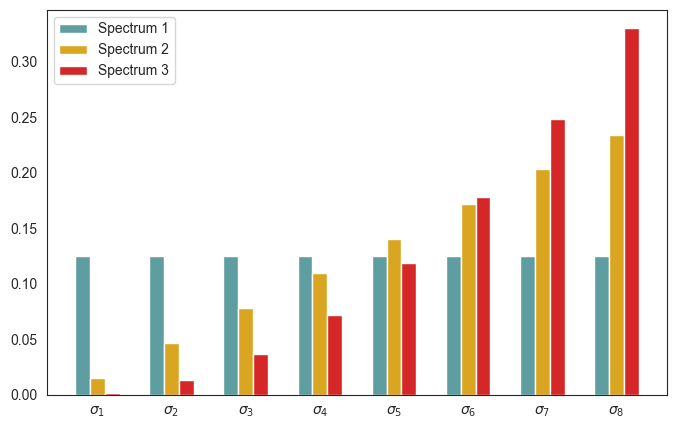

In [4]:
batch_size = 8

sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

offset = 0.2
colors = ["cadetblue", "goldenrod", "tab:red"]
x = np.arange(batch_size)
for i in range(3):
    spectrum = make_extremile_spectrum(batch_size, i + 1.)
    ax.bar(x + i * offset, spectrum, color=colors[i], width=offset, label=f"Spectrum {i + 1}")
ax.legend(loc="upper left")
ax.set_xticks(x + offset)
ax.set_xticklabels([r"$\sigma_1$", r"$\sigma_2$", r"$\sigma_3$", r"$\sigma_4$", r"$\sigma_5$", r"$\sigma_6$", r"$\sigma_7$", r"$\sigma_8$"])
plt.show()

After specifying the spectrum, one can use estimators in the `scikit-learn` interface to fit linear and logit-linear models on data. Examples are shown below.

In [6]:
np.random.seed(123)
n = 100
X = np.random.normal(size=(n, 10))

y1 = np.random.normal(size=(n,))           # Regression
y2 = np.random.binomial(1, 0.5, size=(n,)) # Binary classification
y3 = np.random.choice(5, size=(n,))        # Multiclass classification

spectrum = make_extremile_spectrum(n, 2.0)
model1 = Ridge(spectrum=spectrum).fit(X, y1)
model2 = BinaryLogisticRegression(spectrum=spectrum).fit(X, y2)
model3 = MultinomialLogisticRegression(spectrum=spectrum).fit(X, y3)

While all variables have a `predict` method, the latter two also have `predict_proba` methods.